In this topic, we will use the metric **"Silhouette Coefficient score "** which computes the average of the **Silhouette Coefficient** of all examples in the dataset.
http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

Indeed, when the "ground truth" or when the labels are unknown, we need to evaluate different clusterings using the model itself. The **Silhouette Coefficient** (sklearn.metrics.silhouette_score) is a metric that allows this type of evaluation to be carried out. 

Indeed, a high **Silhouette Coefficient score** - close to 1 - relates to a model with better defined  **Clusters**.  Here we will be using the Kmean implementation of Scikit-Learn. 

The **Silhouette Coefficient** is defined for each sample and is composed of two scores:


a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.

The **Silhouette Coefficient s** for a single sample is then given as:

$$\Large s = \frac{b - a}{max(a, b)}$$

## 1- Import some useful modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from numpy.random import randn, uniform
from scipy.stats import norm

# to make this notebook's output stable across runs
np.random.seed(42)

## 2 - generate a dataset with variables coming from 3 different distributions

### For the sake of simplicity we will generate 3 datasets with only one variable for each one. But obviously, this code is intended to be used with multivariate datasets.

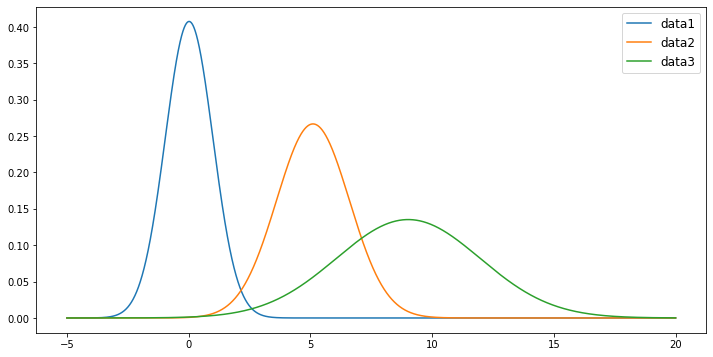

In [2]:
data1 = randn(1000,1)
data2 = 1.5*randn(1000,1) + 5
data3 = 3*randn(1000,1) + 9

x_axis = np.arange(-5,20,0.001)
fig = plt.figure(figsize=(12,6))
plt.plot(x_axis, norm.pdf(x_axis,np.mean(data1),np.std(data1)), label= "data1")
plt.plot(x_axis, norm.pdf(x_axis,np.mean(data2),np.std(data2)), label= "data2")
plt.plot(x_axis, norm.pdf(x_axis,np.mean(data3),np.std(data3)), label ="data3")
plt.legend(loc = "best",fontsize = 'large')
plt.show();

In [3]:
data=np.vstack((data1, data2, data3))
data =shuffle(data,random_state=42)
data.shape

(3000, 1)

## 3 - Write a function that makes use of silhouette_score metric to assess the best split in data provided with unknown labels.

In [4]:
def Best_Clustering(data = data, max_clusters = 10, visualization = True):
    
    n_clusters_list=[]
    silhouette_list=[]
    
    for n_c in range(2,max_clusters+1): 
        kmeans_model = KMeans(n_clusters=n_c, random_state=42).fit(data) 
        labels = kmeans_model.labels_
        n_clusters_list.append(n_c)
        silhouette_list.append(silhouette_score(data, labels, metric='euclidean'))
    best_params = n_clusters_list[np.argmax(silhouette_list)],max(silhouette_list)
    
    if visualization:
        fig = plt.figure(figsize=(12,6))
        ax = fig.add_subplot(111)
        ax.plot(n_clusters_list,silhouette_list, linewidth=3,label = "Silhouette Score Against # of Clusters")
        ax.set_xlabel("Number of clusters")
        ax.set_ylabel("Silhouette score")
        ax.set_title('Silhouette score according to number of clusters')
        ax.grid(True)
        plt.plot(n_clusters_list[np.argmax(silhouette_list)],max(silhouette_list), "tomato", marker="*",
             markersize=20, label = 'Best Silhouette Score')
    
        plt.legend(loc="best",fontsize = 'large')
        plt.show();
        print( " Best Clustering corresponds to the following point : Number of clusters = %i & Silhouette_score = %.2f."
          %best_params) 
    else:
        return best_params

## 4 - What is the best clustering for my data?

### Let's use the function above

- **Visualization of the best clustering:**

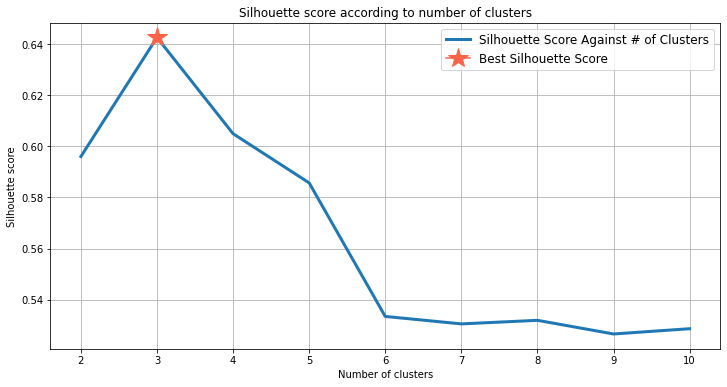

 Best Clustering corresponds to the following point : Number of clusters = 3 & Silhouette_score = 0.64.


In [5]:
Best_Clustering(data=data) 

- **Getting the best parameters only so that we can use them later:**

In [6]:
n_clusters, bs_score = Best_Clustering(data=data,visualization = False)
n_clusters, bs_score

(3, 0.6426624552837248)

**Conclusion:**

**With my function I succeeded in figuring out the number of clusters in my unlabeled data. 3 is exactly the number of clusters in the initially generated data.**

### Note : you can use this snippet code to assess best clustering for mulvariate datasets.